In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dir = '/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src'

In [150]:
header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp']
df = pd.read_csv(dir + '/c60.txt', delimiter=' ', header=None, names=header)  # assuming tab-separated values

In [151]:
# So for the plot x-axis is input width, y-axis is input strength., i.e., normalized bump amplitude. 

df['normalized_bump_amplitude'] = df.iloc[:, 1]/df.iloc[:, 0]
bump_width = df['width']


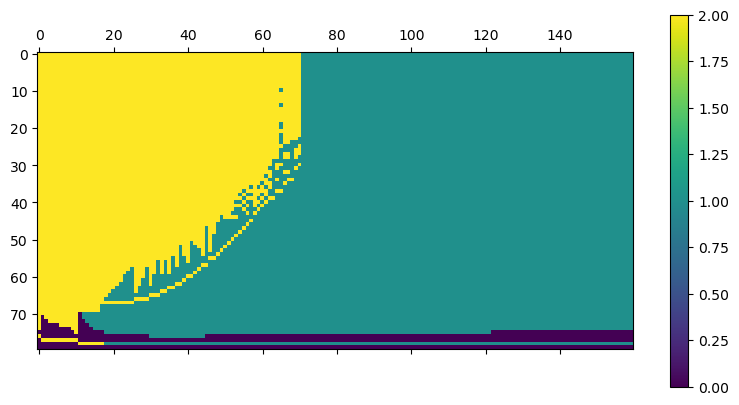

In [152]:
subsets = []
for width in np.unique(x):
    subset = df[df['width'] == width]
    subsets.append(subset)
max_len = max([len(w) for w in subsets])

to_plot = np.empty([max_len*len(subsets)]).reshape(max_len,len(subsets))
for i, subset in enumerate(subsets):
    width = subset.loc[:, 'behaviour'].to_numpy()
    if len(width) < max_len:
        width = np.append(width, [width[-1]] * (max_len - len(width)))
    width = width.reshape(max_len)
    to_plot[:, i] = width

plt.matshow(np.flipud(to_plot))
plt.colorbar()